# Add POI points to `dem.poi`. 

In [1]:
import numpy as np
from osgeo import osr
import pyproj
from pyproj import Geod
from pyproj import Proj, transform
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import xarray as xr

# Retrieve the X and Y coordinates of each point

In [2]:
# Function to get indices of observations inside of the model domain
def get_domain_obs(obsX, obsY, obs_accum, domain_left, domain_right, domain_bottom, domain_top, obs_lat, obs_lon):
    '''
    Find obs whose X and Y are:
        X: greater than domain_left and less than domain_right
        Y: greater than domain_bottom and less than domain_top
    ''' 
    filter_func = np.vectorize(lambda obsX, obsY: obsX <= domain_right and obsX >= domain_left and obsY >= domain_bottom and obsY <= domain_top)
    indices = filter_func(obsX, obsY)
    obs_accum_filter = obs_accum[indices]
    obsX_filter = obsX[indices]
    obsY_filter = obsY[indices]
    obs_lat_filter = obs_lat[indices]
    obs_lon_filter = obs_lon[indices]
    
    return obsX_filter, obsY_filter, obs_accum_filter, obs_lat_filter, obs_lon_filter

In [3]:
ds = xr.open_dataset("/scratch/summit/erke2265/SNOWPACK_WAIS/output/grids/a3d_grids_1980.nc")
ds = ds.isel(easting=slice(15, -15))
ds = ds.isel(northing=slice(15, -15))

In [4]:
domain_left = ds['easting'].min()
domain_right = ds['easting'].max()
domain_bottom = ds['northing'].min()
domain_top = ds['northing'].max()

In [5]:
obs_lat, obs_lon, obs_accumulation, relative_accumulation, relative_accumulation_error = \
    np.loadtxt("/pl/active/nasa_smb/Data/Accumulation_Data_Product.csv", skiprows=1, delimiter=',', unpack=True)

In [6]:
# Source and target EPSG
src = osr.SpatialReference()
tgt = osr.SpatialReference()
src.ImportFromEPSG(4326) # WGS-84
tgt.ImportFromEPSG(3031) # South Polar Stereo

# Define transformation
transform = osr.CoordinateTransformation(src, tgt)

# Initialize arrays
obs_X = np.zeros(len(obs_lon)); obs_X[:] = np.nan
obs_Y = np.zeros(len(obs_lon)); obs_Y[:] = np.nan

# Perform transformation
for j in range(0, len(obs_X)):
    coords = transform.TransformPoint(obs_lat[j], obs_lon[j]) # Lat, Lon
    obs_X[j], obs_Y[j] = coords[0:2]

obs_X, obs_Y, obs_accumulation, obs_lat, obs_lon = get_domain_obs(obs_X, obs_Y, obs_accumulation, domain_left, domain_right, domain_bottom, domain_top, obs_lat, obs_lon)

# Append X and Y coordinates to `dem.poi`

In [7]:
tgt_file = "dem.poi"
print(tgt_file)

dem.poi


In [8]:
# Indices to plot
ind0 = 660
indf = 2000
indices = np.arange(ind0, indf)

In [9]:
obs_X = obs_X[indices]
obs_Y = obs_Y[indices]

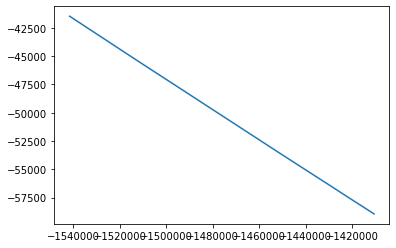

In [10]:
plt.plot(obs_X, obs_Y)

In [11]:
file = open(tgt_file, "a")  # append mode
file.write("\n")
for j in range(0, len(obs_X)):
    line = str(obs_X[j]) + " " + str(obs_Y[j]) + " 0 \n"
    file.write(line)               
file.close()